In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#Fórmulas básicas
def ponto_medio(func, a, b):
    m = (a+b)/2
    return (b-a) * func(m)

def trapezio(func, a, b):
    return (func(a) + func(b)) * (b-a)/2

In [24]:
def plot_vis(func, a, b, n, m = 1):
    intervalo = np.linspace(a, b, m+1)
    
    for i in range(m):
        a = intervalo[i]
        b = intervalo[i+1]
        if n == 0:
            x = [(b+a)/2]
        else:
            x = np.linspace(a, b, n+1)
        
        p = np.polyfit(x, func(x), n)
        
        pts = np.linspace(a, b, 100)
        
        plt.fill_between(pts, 0, np.polyval(p, pts), color = 'r', alpha = 0.5)
        plt.fill_between(pts, 0, func(pts), color = 'g', alpha = 0.5)
        plt.legend(['Aproximação', 'Exata'])

In [3]:
def f(x):
    return np.exp(x)
#Solução exata (integral de f de 0 a 1): e - 1

print(np.exp(1) - 1)
print(ponto_medio(f, 0, 1))
print(trapezio(f, 0, 1))

1.718281828459045
1.6487212707001282
1.8591409142295225


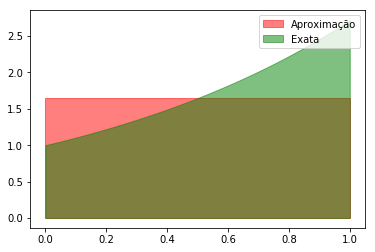

In [26]:
def f(x):
    return np.exp(x)
#Solução exata (integral de f de 0 a 1): e - 1

plot_vis(f, 0, 1, 0)

In [13]:
def ponto_medio_comp(func, a, b, m):
    h = (b-a)/m
    soma = 0
    x0 = a
    for i in range(m):
        x1 = x0 + h
        xm = (x0 + x1)/2
        soma += func(xm)
        x0 += h
    return soma * h

def trapezio_comp(func, a, b, m):
    h = (b-a)/m
    soma = 0
    x0 = a
    for i in range(m):
        x1 = x0 + h
        soma += func(x0) + func(x1) #todos os termos vão aparecer das vezes, exceto o primeiro e o último
        x0 += h
    return soma * h/2

def trapezio_comp2(func, a, b, m):
    h = (b-a)/m
    soma = 0
    for i in range(1, m): #desconsiderando o primeiro e o último ponto
        soma += func(a + i*h) 
    return h/2 * (func(a) + 2 * soma + func(b))

1.718281828459045
1.717163664995687
1.7205185921643018


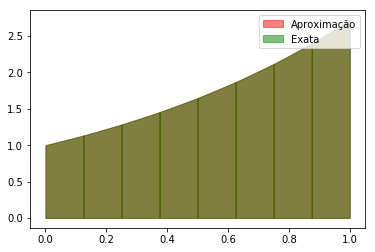

In [25]:
print(np.exp(1) - 1)
m = 8
print(ponto_medio_comp(f, 0, 1, m))
print(trapezio_comp(f, 0, 1, m))

plot_vis(f, 0, 1, 1, m)